In [497]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
#from prettytable import PrettyTable
import seaborn as sns

#import geopandas
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

from datetime import datetime

import seaborn as sns
sns.set()

In [498]:
#data from India folder 
india_statewise = pd.read_csv('data/India/india_statewise.csv')
covid_19_india = pd.read_csv('data/India/covid_19_india.csv')


In [499]:
india_statewise.head(100)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,NaN,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,NaN,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,NaN,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,NaN,33.0


In [500]:
india_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5966 entries, 0 to 5965
Data columns (total 5 columns):
Date            5966 non-null object
State           5966 non-null object
TotalSamples    5966 non-null float64
Negative        3418 non-null object
Positive        4494 non-null float64
dtypes: float64(2), object(3)
memory usage: 233.1+ KB


In [501]:
india_statewise.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        2548
Positive        1472
dtype: int64

In [502]:
2548/5966


0.4270868253436138

In [503]:
india_statewise.State.nunique()

35

In [504]:
india_statewise.describe()

,TotalSamples,Positive
count,5.966000e+03,4.494000e+03
mean,7.168164e+05,2.798319e+04
std,1.345531e+06,1.071249e+05
min,5.800000e+01,0.000000e+00
25%,2.635500e+04,2.940000e+02
50%,1.413525e+05,2.256000e+03
75%,7.230415e+05,1.536500e+04
max,1.104486e+07,1.465911e+06


In [505]:
india_statewise.drop(columns = ['Negative'], inplace = True)

In [506]:
new_india = india_statewise.ffill(axis = 0)

In [507]:
new_india.isnull().sum()

Date            0
State           0
TotalSamples    0
Positive        0
dtype: int64

In [508]:
#new_india = india_statewise.dropna()

In [509]:
new_india

,Date,State,TotalSamples,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,33.0


In [510]:
States = set(new_india.State.values)
States = list(States)

In [511]:
new_india[new_india['State'] == States[4]]

,Date,State,TotalSamples,Positive
4266,2020-04-18,Puducherry,1207.0,7.0
4267,2020-04-19,Puducherry,1245.0,7.0
4268,2020-04-20,Puducherry,1272.0,7.0
4269,2020-04-21,Puducherry,1319.0,7.0
4270,2020-04-22,Puducherry,1473.0,7.0
4271,2020-04-23,Puducherry,1548.0,7.0
4272,2020-04-24,Puducherry,1704.0,7.0
4273,2020-04-25,Puducherry,1864.0,8.0
4274,2020-04-26,Puducherry,1977.0,8.0
4275,2020-04-27,Puducherry,2014.0,8.0


In [512]:
sum_by_dates = new_india.groupby(['Date']).count().reset_index()

In [513]:
sum_by_dates

,Date,State,TotalSamples,Positive
0,2020-04-01,3,3,3
1,2020-04-02,8,8,8
2,2020-04-03,5,5,5
3,2020-04-04,2,2,2
4,2020-04-05,8,8,8
5,2020-04-06,5,5,5
6,2020-04-07,11,11,11
7,2020-04-08,12,12,12
8,2020-04-09,18,18,18
9,2020-04-10,25,25,25


In [514]:
sum_by_dates['Date'] = pd.to_datetime(sum_by_dates['Date'])

In [515]:
sum_by_dates['Date'][0] - sum_by_dates['Date'][189]

Timedelta('-189 days +00:00:00')

**IGNORE CODE ABOVE THIS FOR NOW**

In [516]:
covid_19_india.head(100)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3
6,7,05/02/20,6:00 PM,Kerala,3,0,0,0,3
7,8,06/02/20,6:00 PM,Kerala,3,0,0,0,3
8,9,07/02/20,6:00 PM,Kerala,3,0,0,0,3
9,10,08/02/20,6:00 PM,Kerala,3,0,0,0,3


In [517]:
covid_19_india['Date'] = pd.to_datetime(covid_19_india['Date'], format = '%d/%m/%y')

In [518]:
#covid_19_india[covid_19_india['State/UnionTerritory']=='Telengana' & covid_19_india['Date'] == '12/06/20']
covid_19_india['Date']
#covid_19_india['Date'].sort_values()

0      2020-01-30
1      2020-01-31
2      2020-02-01
3      2020-02-02
4      2020-02-03
5      2020-02-04
6      2020-02-05
7      2020-02-06
8      2020-02-07
9      2020-02-08
10     2020-02-09
11     2020-02-10
12     2020-02-11
13     2020-02-12
14     2020-02-13
15     2020-02-14
16     2020-02-15
17     2020-02-16
18     2020-02-17
19     2020-02-18
20     2020-02-19
21     2020-02-20
22     2020-02-21
23     2020-02-22
24     2020-02-23
25     2020-02-24
26     2020-02-25
27     2020-02-26
28     2020-02-27
29     2020-02-28
          ...    
7056   2020-10-07
7057   2020-10-07
7058   2020-10-07
7059   2020-10-07
7060   2020-10-07
7061   2020-10-07
7062   2020-10-07
7063   2020-10-07
7064   2020-10-07
7065   2020-10-07
7066   2020-10-07
7067   2020-10-07
7068   2020-10-07
7069   2020-10-07
7070   2020-10-07
7071   2020-10-07
7072   2020-10-07
7073   2020-10-07
7074   2020-10-07
7075   2020-10-07
7076   2020-10-07
7077   2020-10-07
7078   2020-10-07
7079   2020-10-07
7080   202

In [519]:
covid_19_india[covid_19_india['Date'] == '2020-06-12']

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2919,2920,2020-06-12,8:00 AM,Andaman and Nicobar Islands,-,-,33,0,38
2920,2921,2020-06-12,8:00 AM,Andhra Pradesh,-,-,3048,80,5429
2921,2922,2020-06-12,8:00 AM,Arunachal Pradesh,-,-,4,0,61
2922,2923,2020-06-12,8:00 AM,Assam,-,-,1432,6,3319
2923,2924,2020-06-12,8:00 AM,Bihar,-,-,3266,36,5983
2924,2925,2020-06-12,8:00 AM,Chandigarh,-,-,286,5,332
2925,2926,2020-06-12,8:00 AM,Chhattisgarh,-,-,447,6,1398
2926,2927,2020-06-12,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,2,0,30
2927,2928,2020-06-12,8:00 AM,Delhi,-,-,12731,1085,34687
2928,2929,2020-06-12,8:00 AM,Goa,-,-,67,0,417


In [520]:
srt_dates = {}
end_dates = {}
states = list(set(covid_19_india[covid_19_india.columns[3]].values))
for i in states:
   srt_dates[i] = (covid_19_india[covid_19_india['State/UnionTerritory']==i]['Date'].iloc[0])
   end_dates[i] = covid_19_india[covid_19_india['State/UnionTerritory']==i]['Date'].iloc[-1]
    
#print(srt_dates['Kerala'])

srt_dates = {k: v for k, v in sorted(srt_dates.items(), key=lambda item: item[1])}
print("Starting Dates:",srt_dates)
print("\n\n")

end_dates = {k: v for k, v in sorted(end_dates.items(), key=lambda item: item[1])}
print("Ending Dates:",end_dates)


Starting Dates: {'Kerala': Timestamp('2020-01-30 00:00:00'), 'Telengana': Timestamp('2020-03-02 00:00:00'), 'Delhi': Timestamp('2020-03-02 00:00:00'), 'Rajasthan': Timestamp('2020-03-03 00:00:00'), 'Haryana': Timestamp('2020-03-04 00:00:00'), 'Uttar Pradesh': Timestamp('2020-03-04 00:00:00'), 'Ladakh': Timestamp('2020-03-07 00:00:00'), 'Tamil Nadu': Timestamp('2020-03-07 00:00:00'), 'Jammu and Kashmir': Timestamp('2020-03-09 00:00:00'), 'Karnataka': Timestamp('2020-03-09 00:00:00'), 'Punjab': Timestamp('2020-03-09 00:00:00'), 'Maharashtra': Timestamp('2020-03-09 00:00:00'), 'Andhra Pradesh': Timestamp('2020-03-12 00:00:00'), 'Uttarakhand': Timestamp('2020-03-15 00:00:00'), 'Odisha': Timestamp('2020-03-16 00:00:00'), 'Puducherry': Timestamp('2020-03-18 00:00:00'), 'West Bengal': Timestamp('2020-03-18 00:00:00'), 'Chandigarh': Timestamp('2020-03-19 00:00:00'), 'Chhattisgarh': Timestamp('2020-03-19 00:00:00'), 'Gujarat': Timestamp('2020-03-20 00:00:00'), 'Madhya Pradesh': Timestamp('2020-

In [521]:
covid_19_india[covid_19_india['State/UnionTerritory'] == 'Daman & Diu']

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2890,2891,2020-06-11,8:00 AM,Daman & Diu,-,-,0,0,2


In [522]:
cv_by_dates = covid_19_india.groupby('Date').sum()

In [523]:
copy = cv_by_dates['Confirmed'][:]
copy = list(copy)
copy.sort()
copy==list(cv_by_dates['Confirmed'])


True

In [524]:
cv_by_dates

,Sno,Cured,Deaths,Confirmed
Date,,,,
2020-01-30,1,0,0,1
2020-01-31,2,0,0,1
2020-02-01,3,0,0,2
2020-02-02,4,0,0,3
2020-02-03,5,0,0,3
2020-02-04,6,0,0,3
2020-02-05,7,0,0,3
2020-02-06,8,0,0,3
2020-02-07,9,0,0,3


In [525]:
copy = cv_by_dates['Deaths'][:]
copy = list(copy)
copy.sort()
copy==list(cv_by_dates['Deaths'])

True

In [526]:
copy = cv_by_dates['Cured'][:]
copy = list(copy)
copy.sort()
copy==list(cv_by_dates['Cured'])

True

In [527]:
cv_by_dates['Daily Cases'] = cv_by_dates['Confirmed']
cases = list(cv_by_dates['Confirmed'])
cases.insert(0,0)
cases = cases[:-1]
daily = list(cv_by_dates['Daily Cases'])
print(len(daily))
print(len(cases))
daily_cases = []
zip_object = zip(daily, cases)
for list1_i, list2_i in zip_object:
    daily_cases.append(list1_i-list2_i)
daily_cases
cv_by_dates['Daily Cases'] = daily_cases

252
252


In [528]:
cv_by_dates['Daily Deaths'] = cv_by_dates['Deaths']
cases = list(cv_by_dates['Deaths'])
cases.insert(0,0)
cases = cases[:-1]
daily = list(cv_by_dates['Daily Deaths'])
print(len(daily))
print(len(cases))
daily_cases = []
zip_object = zip(daily, cases)
for list1_i, list2_i in zip_object:
    daily_cases.append(list1_i-list2_i)
daily_cases
cv_by_dates['Daily Deaths'] = daily_cases

252
252


In [529]:
cv_by_dates['Daily Cured'] = cv_by_dates['Cured']
cases = list(cv_by_dates['Cured'])
cases.insert(0,0)
cases = cases[:-1]
daily = list(cv_by_dates['Daily Cured'])
print(len(daily))
print(len(cases))
daily_cases = []
zip_object = zip(daily, cases)
for list1_i, list2_i in zip_object:
    daily_cases.append(list1_i-list2_i)
daily_cases
cv_by_dates['Daily Cured'] = daily_cases

252
252


In [530]:
#tcks = np.linspace(cv_by_dates.index[0],cv_by_dates.index[-1], 4)
#cv_by_dates.index[0]
mid = cv_by_dates.index[len(cv_by_dates.index)//2]
#print(tcks)

Text(0.5, 1.0, 'INDIA')

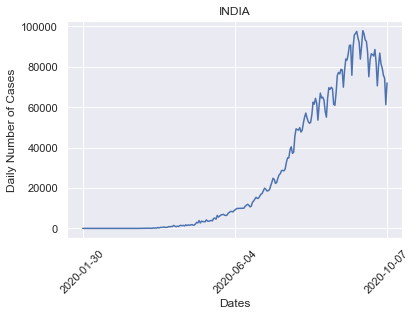

In [531]:
plt.plot(cv_by_dates.index, cv_by_dates['Daily Cases'])
plt.xlabel('Dates')
plt.ylabel('Daily Number of Cases')
plt.xticks(ticks = [cv_by_dates.index[0], mid, cv_by_dates.index[-1]], rotation = 45)
plt.title('INDIA')

Text(0.5, 1.0, 'INDIA')

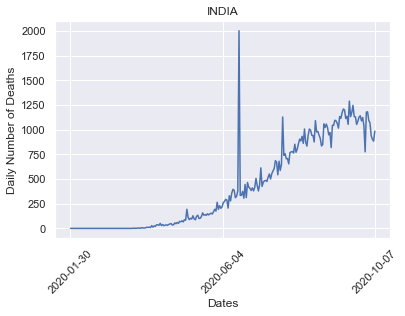

In [532]:
plt.plot(cv_by_dates.index, cv_by_dates['Daily Deaths'])
plt.xlabel('Dates')
plt.ylabel('Daily Number of Deaths')
plt.xticks(ticks = [cv_by_dates.index[0], mid, cv_by_dates.index[-1]], rotation = 45)
plt.title('INDIA')

Text(0.5, 1.0, 'INDIA')

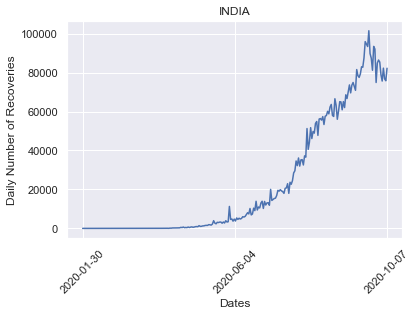

In [533]:
plt.plot(cv_by_dates.index, cv_by_dates['Daily Cured'])
plt.xlabel('Dates')
plt.ylabel('Daily Number of Recoveries')
plt.xticks(ticks = [cv_by_dates.index[0],mid, cv_by_dates.index[-1]], rotation = 45)
plt.title('INDIA')

In [534]:
states = list(set(covid_19_india['State/UnionTerritory'].values))

In [535]:
df_state = {}
for i in states:
     
    temp = covid_19_india[covid_19_india['State/UnionTerritory'] == i]
    df_state[i] = temp.groupby('Date').sum()

In [536]:
df_state

{'Ladakh':              Sno  Cured  Deaths  Confirmed
 Date                                      
 2020-03-07    60      0       0          2
 2020-03-08    66      0       0          2
 2020-03-09    74      0       0          2
 2020-03-10    87      0       0          2
 2020-03-11   105      0       0          2
 2020-03-12   116      0       0          3
 2020-03-13   129      0       0          3
 2020-03-14   142      0       0          3
 2020-03-15   160      0       0          3
 2020-03-16   175      0       0          4
 2020-03-17   190      0       0          6
 2020-03-18   206      0       0          8
 2020-03-19   225      0       0          8
 2020-03-20   245      0       0         10
 2020-03-21   267      0       0         13
 2020-03-22   290      0       0         13
 2020-03-23   313      0       0         13
 2020-03-24   337      0       0         13
 2020-03-25   362      0       0         13
 2020-03-26   379      0       0         13
 2020-03-27   406     

In [537]:
df_state.keys()

dict_keys(['Ladakh', 'Andaman and Nicobar Islands', 'Unassigned', 'Meghalaya', 'Uttarakhand', 'Telangana***', 'Puducherry', 'Goa', 'Rajasthan', 'Manipur', 'Bihar', 'Daman & Diu', 'Jharkhand', 'Andhra Pradesh', 'Arunachal Pradesh', 'Tripura', 'Chandigarh', 'Chhattisgarh', 'Odisha', 'Telangana', 'Assam', 'Dadra and Nagar Haveli and Daman and Diu', 'Mizoram', 'Madhya Pradesh', 'Tamil Nadu', 'Telengana', 'Jammu and Kashmir', 'Dadar Nagar Haveli', 'Sikkim', 'Cases being reassigned to states', 'Karnataka', 'Telengana***', 'Himachal Pradesh', 'Kerala', 'Haryana', 'Uttar Pradesh', 'Delhi', 'Gujarat', 'Punjab', 'West Bengal', 'Maharashtra', 'Nagaland'])

In [544]:
#fig, axs = plt.subplots(2)
#j = 0
for i in df_state.keys():
    
    
    df_state[i]['Daily Cases'] = df_state[i]['Confirmed']
    cases = list(df_state[i]['Confirmed'])
    cases.insert(0,0)
    cases = cases[:-1]
    daily = list(df_state[i]['Daily Cases'])
    #print(len(daily))
    #print(len(cases))
    daily_cases = []
    zip_object = zip(daily, cases)
    for list1_i, list2_i in zip_object:
        daily_cases.append(list1_i-list2_i)
    daily_cases
    df_state[i]['Daily Cases'] = daily_cases
    
    mid = df_state[i].index[len(df_state[i].index)//2]
    plt.plot(df_state[i].index, df_state[i]['Daily Cases'])
    plt.xlabel('Dates')
    plt.ylabel('Daily Number of Cases')
    plt.xticks(ticks = [df_state[i].index[0], mid, df_state[i].index[-1]])
    plt.title(f'State: {i}')
    if(i == 'Telangana***'):
        i = 'Telangana_star3'
    elif(i == 'Telengana***'):
        i = 'Telengana_star3'
    plt.savefig(f'State_{i}_plt.png')
    plt.clf()
    

<Figure size 432x288 with 0 Axes>

In [ ]:
df_state

In [ ]:
mid = df_state[i].index[len(df_state[i].index)//2]
plt.plot(df_state[i].index, df_state[i]['Daily Cases'])
plt.xlabel('Dates')
plt.ylabel('Daily Number of Cases')
plt.xticks(ticks = [df_state[i].index[0], mid, df_state[i].index[-1]], rotation = 45)
plt.title(f'State: {i}')

In [ ]:
a = True
b = False
c = False

if not a or b:
    print ("CORRECT ANSWER")
elif not a or not b and c:
    print ("MAYBE CORRECT ANSWER")
elif not a or b or not b and a:
    print ("MAYBE WRONG ANSWER")
else:
    print ("WRONG ANSWER")

In [ ]:
class Sample:
    def __init__(self):
        self.x = 5
    def change(self):
        self.x = 10

class Derived_sample(Sample):
    def change(self):
        self.x=self.x+1
        return self.x

def main():
    obj = Derived_sample()
    print(obj.change())

main()

In [ ]:
class A:
    def one(self):
        return self.two()

    def two(self):
        return 'A'

class B(A):
    def two(self):
        return 'B'
obj1=A()
obj2=B()
print(obj1.one(),obj2.one())

In [ ]:
import pandas as pd
df = pd.DataFrame({'A':[2,3,5], 'B': [4,6,10]})
print(df.set_index('A').columns)
df

In [ ]:
df = pd.DataFrame({'A':[2,3,5], 'B': [4,6,10]})
df.columns

In [ ]:
np.random.uniform(0,1,5)

In [ ]:
np.random.normal(0,1,5)